# Import Libraries

In [2]:
import dtale
import pandas as pd

In [3]:
df = pd.read_csv('Example Data.csv')

In [8]:
# Fungsi untuk mengonversi format tanggal ke YYYY-MM-DD
def convert_date_format(date):
    for fmt in ("%d/%m/%Y", "%d-%m-%Y"):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            continue
    return pd.to_datetime(date)

# Terapkan fungsi konversi pada kolom Dt_Customer
df['Dt_Customer'] = df['Dt_Customer'].apply(convert_date_format)

In [10]:
df.set_index('ID')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,6,0,1,0,0,0,0,3,11,0


In [11]:
d = dtale.show(df)
d.open_browser()

2024-08-01 11:26:26,984 - ERROR    - Exception occurred while processing request: It appears there is duplicates in your index, please specify an aggregation!
Traceback (most recent call last):
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\dtale\views.py", line 119, in _handle_exceptions
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\dtale\views.py", line 4286, in get_timeseries_analysis
    data = ts_rpt.run()
           ^^^^^^^^^^^^
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\dtale\timeseries_analysis.py", line 48, in run
    return self.report.run(data)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\dtale\timeseries_analysis.py", line 93, in run
    df = build_data(data, self.cfg)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\AppD

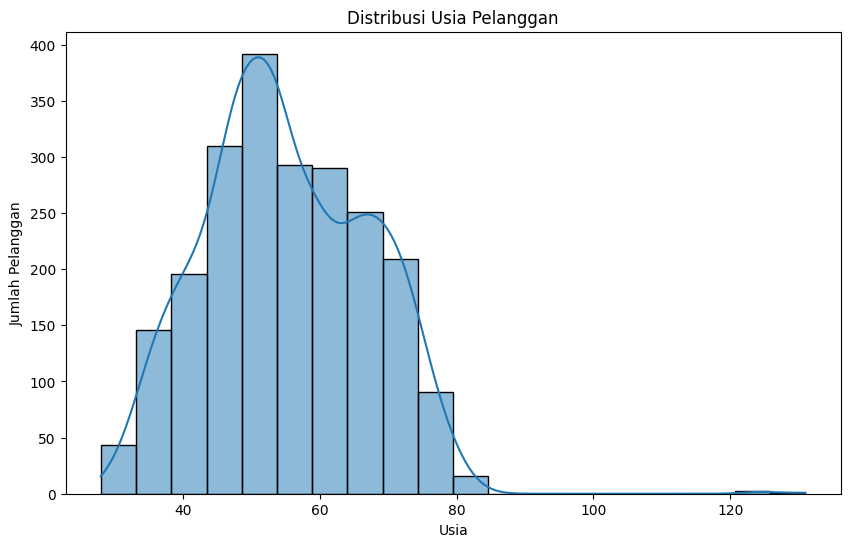

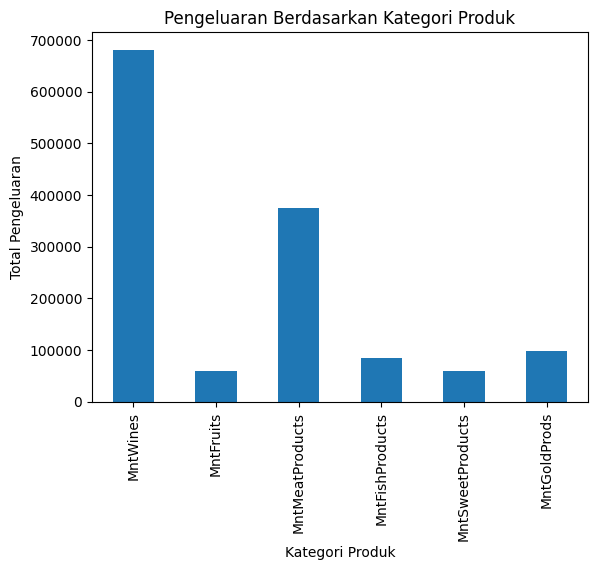

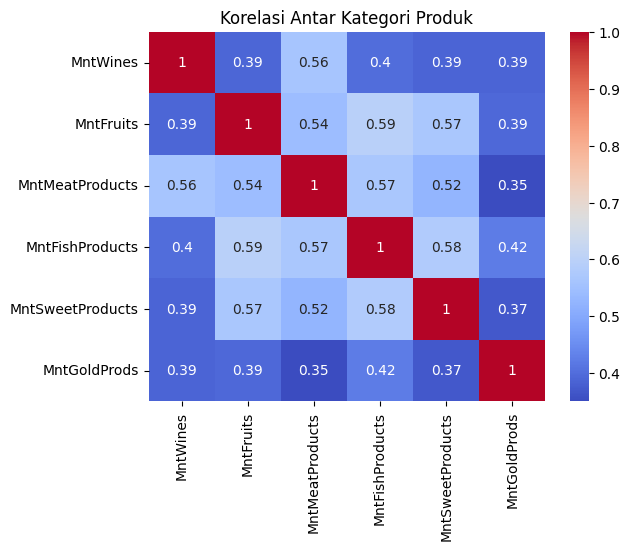

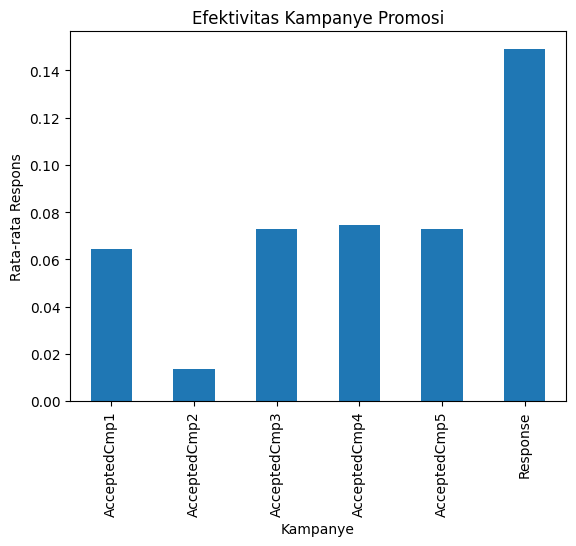

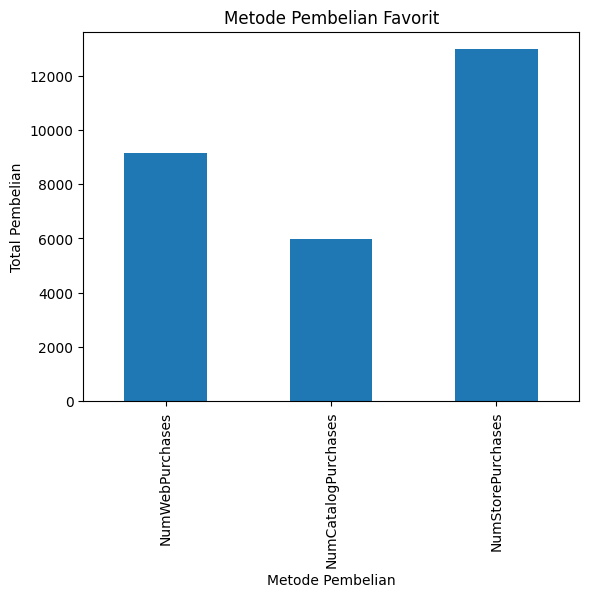

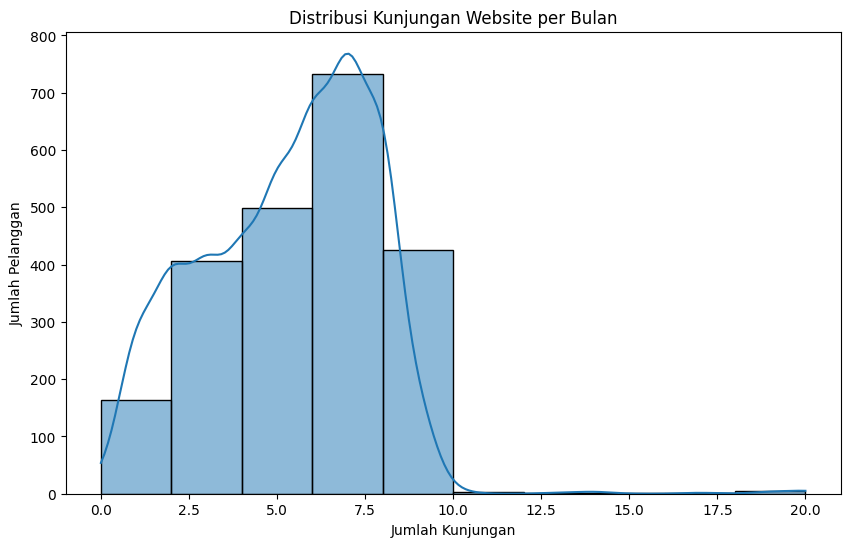

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menambah kolom usia berdasarkan Year_Birth
df['Age'] = 2024 - df['Year_Birth']

# Analisis distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Analisis pengeluaran berdasarkan kategori produk
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[categories].sum().plot(kind='bar')
plt.title('Pengeluaran Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Pengeluaran')
plt.show()

# Analisis korelasi antar kategori produk
corr = df[categories].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Kategori Produk')
plt.show()

# Efektivitas kampanye promosi
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df[campaigns].mean().plot(kind='bar')
plt.title('Efektivitas Kampanye Promosi')
plt.xlabel('Kampanye')
plt.ylabel('Rata-rata Respons')
plt.show()

# Metode pembelian favorit
purchase_methods = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df[purchase_methods].sum().plot(kind='bar')
plt.title('Metode Pembelian Favorit')
plt.xlabel('Metode Pembelian')
plt.ylabel('Total Pembelian')
plt.show()

# Kunjungan website per bulan
plt.figure(figsize=(10, 6))
sns.histplot(df['NumWebVisitsMonth'], bins=10, kde=True)
plt.title('Distribusi Kunjungan Website per Bulan')
plt.xlabel('Jumlah Kunjungan')
plt.ylabel('Jumlah Pelanggan')
plt.show()